Loading dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("volleyball_stats_with_names.csv")
df.head()

,player,team,match_id,attacks,kills,errors,blocks,digs,aces,serve_errors,receptions,efficiency
0,Saurabh More,Team_D,M8,25,6,1,2,6,2,2,28,0.200
1,Amit Thorat,Team_D,M8,28,2,4,1,7,3,1,10,-0.071
2,Rohan Patil,Team_D,M5,37,11,1,5,12,3,0,21,0.270
3,Ritesh Salunkhe,Team_C,M10,32,27,2,6,3,0,2,9,0.781
4,Nikhil Jagtap,Team_E,M9,22,3,0,1,9,0,1,25,0.136


Top Attackers

In [23]:
top_attackers = df.groupby("player")["kills"].sum().sort_values(ascending=False)
top_attackers.head(10)


player
Tushar Gawande     130
Manish Pawar       115
Ritesh Salunkhe    105
Amit Thorat         99
Sanket Patil        98
Tejas Koli          88
Shreyas More        86
Rohit Gaikwad       80
Mayur Kadam         73
Rajat Jadhav        69
Name: kills, dtype: int64

Top Blockers

In [24]:
top_blockers = df.groupby("player")["blocks"].sum().sort_values(ascending=False)
top_blockers.head(10)


player
Chinmay Pawar      47
Ritesh Salunkhe    41
Shreyas More       41
Manish Pawar       39
Amit Thorat        35
Mayur Kadam        35
Tejas Koli         32
Abhishek Kunte     30
Rohit Gaikwad      27
Rohan Patil        24
Name: blocks, dtype: int64

Serve Efficiency

In [25]:
df["serve_eff"] = df["aces"] - df["serve_errors"]
top_servers = df.groupby("player")["serve_eff"].sum().sort_values(ascending=False)
top_servers.head(10)


player
Abhishek Kunte       13
Akash Sharma         10
Rajat Jadhav          9
Harsh Khatri          6
Siddhant Kulkarni     6
Jayant Bhosale        5
Rohan Patil           5
Sanket Patil          5
Tushar Gawande        5
Shubham Chavan        4
Name: serve_eff, dtype: int64

Team-level stats

In [26]:
team_summary = df.groupby("team")[["kills","blocks","digs","aces"]].sum()
team_summary


,kills,blocks,digs,aces
team,,,,
Team_A,454,146,279,68
Team_B,414,169,166,67
Team_C,348,119,175,51
Team_D,248,110,191,61
Team_E,279,120,204,63


Attack efficiency

In [27]:
df["attack_eff"] = (df["kills"] - df["errors"]) / df["attacks"]
attack_eff_rank = df.groupby("player")["attack_eff"].mean().sort_values(ascending=False)
attack_eff_rank.head(10)


player
Tushar Gawande     0.806546
Ritesh Salunkhe    0.620209
Aditya Gokhale     0.602083
Rohit Gaikwad      0.567121
Rahul Jadhav       0.507576
Anurag Naik        0.506022
Aniket Joshi       0.500000
Karan Deshmukh     0.454283
Harsh Khatri       0.441667
Rajat Jadhav       0.424396
Name: attack_eff, dtype: float64

Visualization example

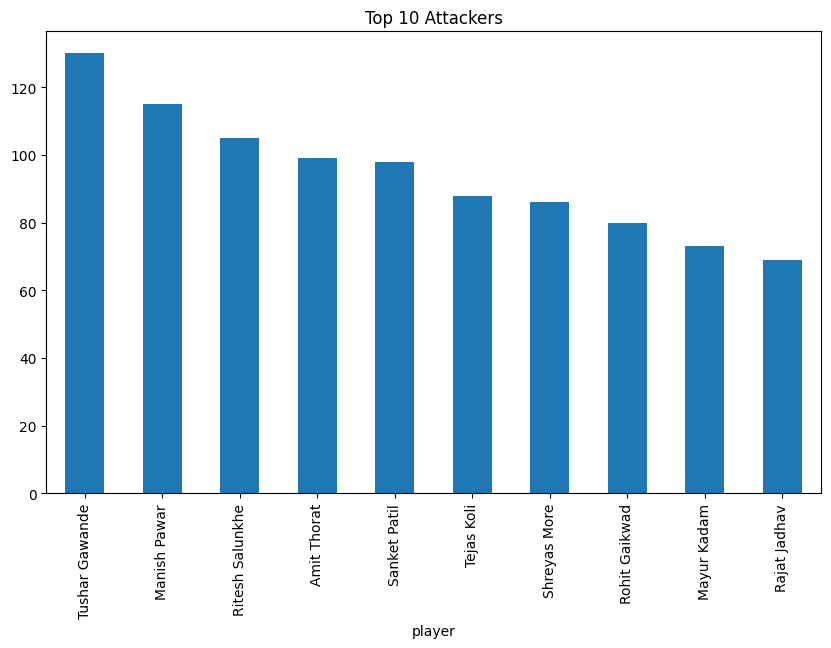

In [28]:
top_attackers.head(10).plot(kind="bar", figsize=(10,6), title="Top 10 Attackers")
plt.show()
